https://www.kaggle.com/datasets/saisaathvik/house-rent-prices-of-metropolitan-cities-in-india?select=Kolkata_rent.csv

In [ ]:
import pandas as pd
import numpy as np
import statistics as st

In [75]:
chennai_df = pd.read_csv('Chennai.csv')
chennai_df['dataset'] = 'Chennai'

hyderabad_df = pd.read_csv('Hyderabad.csv')
hyderabad_df['dataset'] = 'Hydebarad'

kolkata_df = pd.read_csv('Kolkata.csv')
kolkata_df['dataset'] = 'Kolkata'

In [ ]:
chennai_df.head()

In [ ]:
hyderabad_df.head()

In [ ]:
kolkata_df.head()

In [76]:
df = pd.concat([chennai_df, hyderabad_df, kolkata_df])

In [102]:
df.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,dataset
0,OWNER,3.0,BHK,Apartment,Ambattur,17000.0,1570.0,Semi-Furnished,2,Chennai
1,OWNER,2.0,BHK,Apartment,Kelambakkam,16000.0,1402.0,Semi-Furnished,2,Chennai
2,OWNER,2.0,BHK,Apartment,Adyar,20000.0,800.0,Semi-Furnished,2,Chennai
3,OWNER,2.0,BHK,Apartment,Sembakkam,14000.0,1180.0,Unfurnished,2,Chennai
4,OWNER,1.0,BHK,Independent House,Mogappair,7000.0,400.0,Unfurnished,1,Chennai


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28944 entries, 0 to 9899
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   seller_type    28944 non-null  object 
 1   bedroom        28944 non-null  float64
 2   layout_type    28944 non-null  object 
 3   property_type  28944 non-null  object 
 4   locality       28944 non-null  object 
 5   price          28944 non-null  object 
 6   area           28944 non-null  float64
 7   furnish_type   28944 non-null  object 
 8   bathroom       28944 non-null  object 
 9   dataset        28944 non-null  object 
dtypes: float64(2), object(8)
memory usage: 2.4+ MB


In [81]:
df['property_type'] = df['property_type'].astype(str)
df['bathroom'] = df['bathroom'].str.replace('bathrooms', '')
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].astype(np.float64)

##### d. Tratamento de dados ausentes e duplicados.

In [78]:
df.dropna(inplace=True)

In [97]:
df_no_duplicated = df.drop_duplicates()

Nesse caso específico, não faz sentido remover os "valores duplicados" pois cada apartamento é único.
Ex: por mais que tenha o mesmo preço e quantidade de quartos, pode ter quantidade de banheiros, logo não é um registro duplicado.

In [100]:
len(df)

28944

In [101]:
len(df_no_duplicated)

18687

##### i. Análise de Correlações


In [94]:
df.corr()['price']

C:\Users\anjos\AppData\Local\Temp\ipykernel_6160\772394692.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price']


bedroom    0.505890
price      1.000000
area       0.422711
Name: price, dtype: float64

### Análise numérica de estatísticas descritivas

In [95]:
def analise_desc_num(coluna):
    global df
    
    dct_retorno = {}    
    s_coluna = df[coluna].value_counts()
    
    media = st.mean(s_coluna)
    moda = st.mode(s_coluna)
    mediana = st.median(s_coluna)
    desvio_padrao = st.stdev(s_coluna)
    quartis = st.quantiles(s_coluna)
    
    dct_retorno['MEDIA'] = round(media, 2)
    dct_retorno['MODA'] = moda
    dct_retorno['MEDIANA'] = mediana
    dct_retorno['DESVIO PADRAO'] = round(desvio_padrao, 2)
    dct_retorno['QUARTIS'] = quartis    
    
    return dct_retorno
    

#### Coluna - 'seller_type'

{'MEDIA': 9648,
 'MODA': 15863,
 'MEDIANA': 12938,
 'DESVIO PADRAO': 8360.48,
 'QUARTIS': [143.0, 12938.0, 15863.0]}

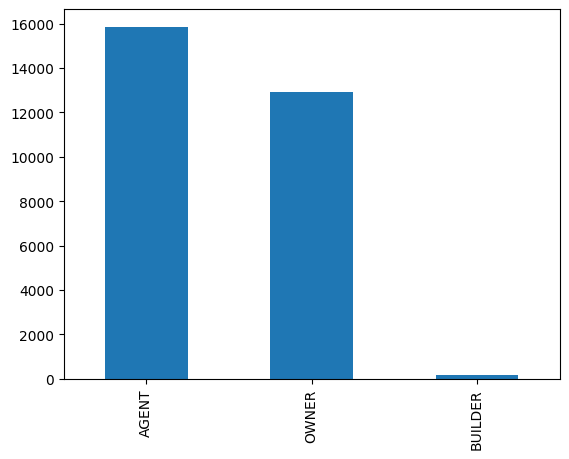

In [96]:
coluna_analise = 'seller_type'

statis = analise_desc_num(coluna_analise)

df[coluna_analise].value_counts().plot(kind='bar')
statis

#### Coluna - 'layout_type'

In [ ]:
coluna_analise = 'layout_type'

statis = analise_desc_num(coluna_analise)

print(statis)
df[coluna_analise].value_counts().plot(kind='bar')

#### Coluna - 'property_type'

In [ ]:
coluna_analise = 'property_type'

statis = analise_desc_num(coluna_analise)

print(statis)
df[coluna_analise].value_counts().plot(kind='bar')